# Fake news prediction


#####  Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle

## Importing data
 1 - Fake news 
 0 - real news

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Basic Data analysis

##### Shape of dataset

In [4]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


##### To check null value

In [5]:
print(train.isnull().sum())
print('    *********    ')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
    *********    
id          0
title     122
author    503
text        7
dtype: int64


##### To check if data is balanced or not

In [6]:
train['label'].value_counts() 

1    10413
0    10387
Name: label, dtype: int64

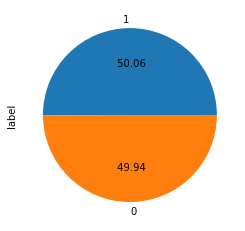

In [7]:
train['label'].value_counts().plot.pie(autopct= '% .2f'); 

##### Word Cloud

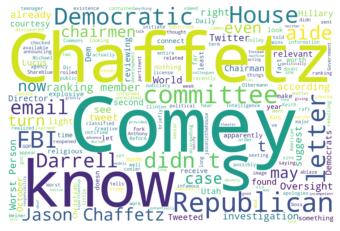

In [8]:
text = train.text[0]
wordcloud = WordCloud(width = 1500, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Preprocessing

##### Combining title, author and text column

In [9]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

##### Cleaning Data

In [10]:
train['total'] = train['total'].apply(nfx.remove_special_characters)
train['total'] = train['total'].apply(nfx.remove_puncts)
train['total'] = train['total'].apply(nfx.clean_text) #remove stopwords, extra spaces and convert to lowercase 

In [11]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt comeys letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth fired consortiumnewscom truth fired octo...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed single airstrike identifie...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...


In [12]:
test['total'] = test['total'].apply(nfx.remove_special_characters)
test['total'] = test['total'].apply(nfx.remove_puncts)
test['total'] = test['total'].apply(nfx.clean_text)

##### dropping all columns except total and label

In [13]:
train = train[['total','label']] 
train.head()

,total,label
0,house dem aide didnt comeys letter jason chaff...,1
1,flynn hillary clinton big woman campus breitba...,0
2,truth fired consortiumnewscom truth fired octo...,1
3,15 civilians killed single airstrike identifie...,1
4,iranian woman jailed fictional unpublished sto...,1


##### Splitting the dataset into Dependent and Independent Features

In [14]:
X = train['total']   # Independent Features
Y = train['label']   # Dependent Features

##### Splitting data to train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
X_train.shape

(15600,)

##### Bag of Words (Bow) method

In [16]:
countVect = CountVectorizer()
countVect.fit(X)

X_train_cv = countVect.transform(X_train)
X_test_cv = countVect.transform(X_test)

print(len(countVect.get_feature_names_out()))
print(X_train_cv.shape)

201453
(15600, 201453)


# Creating Model

#### Logistic Regression Model

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

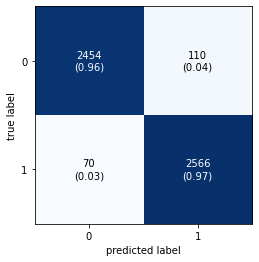

In [17]:
model_1 = LogisticRegression(C=1e5,solver='liblinear' ,max_iter=1000) #regularization - to avoid overfitting C=1e5,
model_1.fit(X_train_cv , y_train)
pred_1 = model_1.predict(X_test_cv)
conf_matrix_1 = confusion_matrix(y_test, pred_1)
plot_confusion_matrix(conf_matrix_1,figsize=(4,4),show_normed=True)

#### DecisionTree Model

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

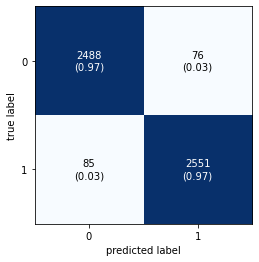

In [18]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train_cv,y_train)
pred_2 = model_2.predict(X_test_cv)
conf_matrix_2 = confusion_matrix(y_test, pred_2)
plot_confusion_matrix(conf_matrix_2,figsize=(4,4),show_normed=True)

#### Random Forest Model

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

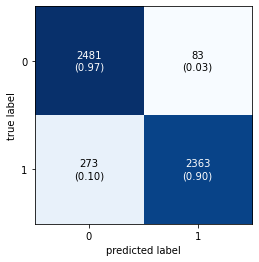

In [19]:
model_3 = RandomForestClassifier()
model_3.fit(X_train_cv,y_train)
pred_3 = model_3.predict(X_test_cv)
conf_matrix_3 = confusion_matrix(y_test, pred_3)
plot_confusion_matrix(conf_matrix_3,figsize=(4,4),show_normed=True)

#### Xgboost Model

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

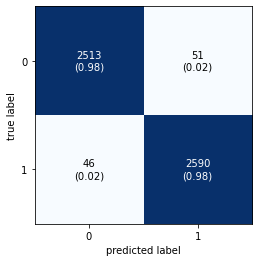

In [20]:
model_4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_4.fit(X_train_cv,y_train)
pred_4 = model_4.predict(X_test_cv)
conf_matrix_4 = confusion_matrix(y_test, pred_4)
plot_confusion_matrix(conf_matrix_4,figsize=(4,4),show_normed=True)

## Model Evaluation

In [21]:
score_1 = accuracy_score(y_test,pred_1)
score_2 = accuracy_score(y_test,pred_2)
score_3 = accuracy_score(y_test,pred_3)
score_4 = accuracy_score(y_test,pred_4)
result = pd.DataFrame([["Logistic Regression",score_1],["Decision Tree",score_2],["Random Forest",score_3],["XGBOOST",score_4]],columns=["Model","Accuracy"])
result

,Model,Accuracy
0,Logistic Regression,0.965385
1,Decision Tree,0.969038
2,Random Forest,0.931538
3,XGBOOST,0.981346


##### Therefore, we choose Xgboost model

## Pickling

In [22]:
pickle.dump(countVect,open('countvect.pkl','wb'))
filename="model.sav"
pickle.dump(model_4,open(filename,"wb"))